In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
plt.style.use('fivethirtyeight')

In [5]:
data = pd.read_csv('us-counties.csv')

In [6]:
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


Group by states in USA

In [7]:
data.groupby('state')['cases'].sum()

state
Alabama                       15522
Alaska                         1841
Arizona                       18401
Arkansas                       9050
California                   134700
Colorado                      44606
Connecticut                   44759
Delaware                       5147
District of Columbia           8311
Florida                      100127
Georgia                       59001
Guam                           1801
Hawaii                         3436
Idaho                          8282
Illinois                      91207
Indiana                       32441
Iowa                           7255
Kansas                         6395
Kentucky                       8684
Louisiana                     95160
Maine                          4703
Maryland                      26650
Massachusetts                 99705
Michigan                     118944
Minnesota                      9479
Mississippi                   14243
Missouri                      19339
Montana               

In [8]:
ca_data = data[data.state == 'California']

In [10]:
ca_data.head()

,date,county,state,fips,cases,deaths
5,2020-01-25,Orange,California,6059.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0
10,2020-01-26,Orange,California,6059.0,1,0
14,2020-01-27,Los Angeles,California,6037.0,1,0
15,2020-01-27,Orange,California,6059.0,1,0


In [1]:
# ca_data.groupby('date')['cases'].sum().sort_values(ascending=False)

Text(0, 0.5, 'number of cases per day')

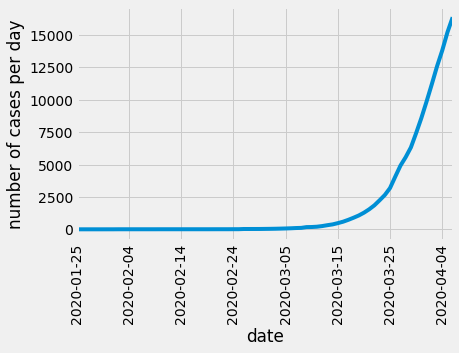

In [11]:
ca_data.groupby('date')['cases'].sum().plot()
plt.xticks(rotation=90)
plt.ylabel("number of cases per day")

In [12]:
ts_ca_data = ca_data.groupby('date')['cases'].sum()

In [13]:
ts_ca_data.count()

73

In [14]:
ts_ca_data.head(25)

date
2020-01-25    1
2020-01-26    2
2020-01-27    2
2020-01-28    2
2020-01-29    2
2020-01-30    2
2020-01-31    3
2020-02-01    3
2020-02-02    6
2020-02-03    6
2020-02-04    6
2020-02-05    6
2020-02-06    6
2020-02-07    6
2020-02-08    6
2020-02-09    6
2020-02-10    7
2020-02-11    7
2020-02-12    7
2020-02-13    7
2020-02-14    7
2020-02-15    7
2020-02-16    7
2020-02-17    7
2020-02-18    7
Name: cases, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10697a898>],
      dtype=object)

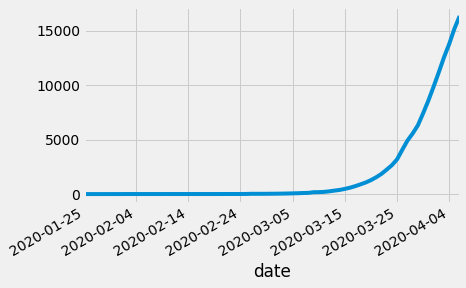

In [15]:
ts_ca_data.plot(subplots=True)

In [16]:
ts_ca_data = ts_ca_data.values

In [17]:
ts_ca_data_mean = ts_ca_data[:50].mean()
ts_ca_data_std = ts_ca_data[ :50].std()

In [18]:
ts_ca_data = (ts_ca_data-ts_ca_data_mean)/ts_ca_data_std

In [19]:
ts_ca_data

array([-5.46642785e-01, -5.34686469e-01, -5.34686469e-01, -5.34686469e-01,
       -5.34686469e-01, -5.34686469e-01, -5.22730153e-01, -5.22730153e-01,
       -4.86861204e-01, -4.86861204e-01, -4.86861204e-01, -4.86861204e-01,
       -4.86861204e-01, -4.86861204e-01, -4.86861204e-01, -4.86861204e-01,
       -4.74904887e-01, -4.74904887e-01, -4.74904887e-01, -4.74904887e-01,
       -4.74904887e-01, -4.74904887e-01, -4.74904887e-01, -4.74904887e-01,
       -4.74904887e-01, -4.74904887e-01, -4.62948571e-01, -4.50992254e-01,
       -4.50992254e-01, -4.50992254e-01, -4.27079622e-01, -4.27079622e-01,
       -2.47734876e-01, -2.47734876e-01, -2.35778559e-01, -2.23822243e-01,
       -1.64040661e-01, -1.04259079e-01, -2.05648642e-02,  9.89982997e-02,
        2.42474096e-01,  4.09862526e-01,  6.37032537e-01,  7.80508334e-01,
        1.49788732e+00,  1.58158153e+00,  1.85657681e+00,  2.45439263e+00,
        3.26742214e+00,  3.99675744e+00,  5.15652013e+00,  6.47171494e+00,
        8.19342450e+00,  

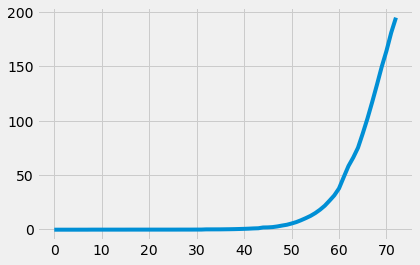

In [20]:
plt.plot(ts_ca_data)

In [70]:
type(ts_ca_data)

pandas.core.series.Series

In [23]:
# split and reshape the data for sequence prediction

def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = np.arange(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [25]:
x_train,y_train = univariate_data(ts_ca_data,0,50,5,0)

In [26]:
x_train,y_train

(array([[[-0.54664279],
         [-0.53468647],
         [-0.53468647],
         [-0.53468647],
         [-0.53468647]],
 
        [[-0.53468647],
         [-0.53468647],
         [-0.53468647],
         [-0.53468647],
         [-0.53468647]],
 
        [[-0.53468647],
         [-0.53468647],
         [-0.53468647],
         [-0.53468647],
         [-0.52273015]],
 
        [[-0.53468647],
         [-0.53468647],
         [-0.53468647],
         [-0.52273015],
         [-0.52273015]],
 
        [[-0.53468647],
         [-0.53468647],
         [-0.52273015],
         [-0.52273015],
         [-0.4868612 ]],
 
        [[-0.53468647],
         [-0.52273015],
         [-0.52273015],
         [-0.4868612 ],
         [-0.4868612 ]],
 
        [[-0.52273015],
         [-0.52273015],
         [-0.4868612 ],
         [-0.4868612 ],
         [-0.4868612 ]],
 
        [[-0.52273015],
         [-0.4868612 ],
         [-0.4868612 ],
         [-0.4868612 ],
         [-0.4868612 ]],
 
        [[-0.486

In [27]:
len(x_train)

45

In [28]:
x_val,y_val = univariate_data(ts_ca_data,50,None,5,0)

In [29]:
len(x_val)

18

In [30]:
# create time steps for plot

def create_time_steps(length):
  return list(range(-length, 0))

In [31]:
# show plot

def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

<module 'matplotlib.pyplot' from '/Users/vasanththirugnanam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

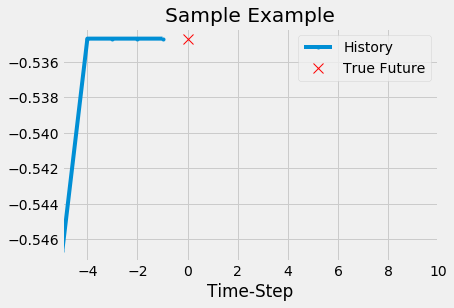

In [32]:
show_plot([x_train[0], y_train[0]], 0, 'Sample Example')

In [33]:
def baseline(history):
  return np.mean(history)

<module 'matplotlib.pyplot' from '/Users/vasanththirugnanam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

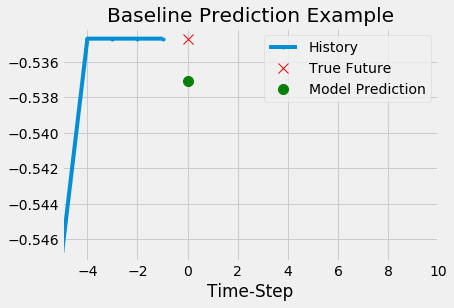

In [34]:
show_plot([x_train[0], y_train[0], baseline(x_train[0])], 0,
           'Baseline Prediction Example')

# LSTM starts

In [36]:
import tensorflow as tf

In [37]:
BATCH_SIZE = 5
BUFFER_SIZE = 100

train_univariate = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [48]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(5, input_shape=x_train.shape[-2:],activation='linear'),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='sgd', loss='mae')

In [39]:
# confirm the shape of validation data
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

(5, 1)


In [51]:
EVALUATION_INTERVAL = 100
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50,verbose=0)

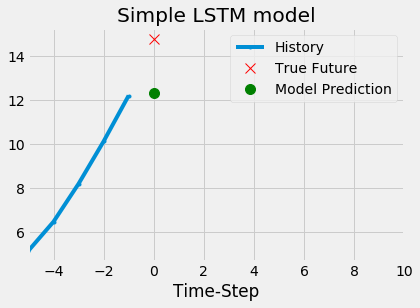

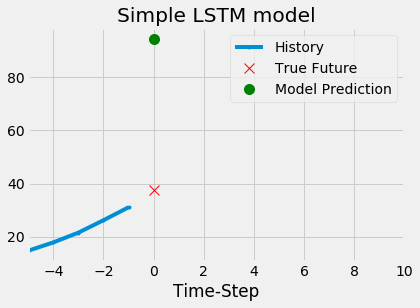

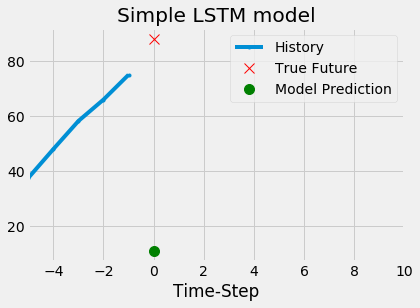

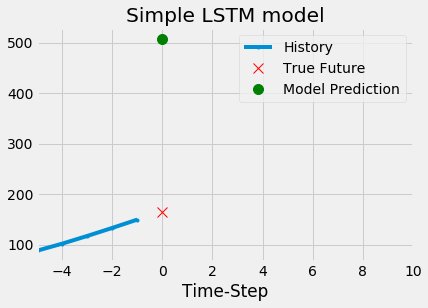

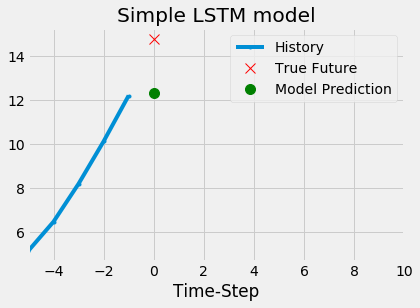

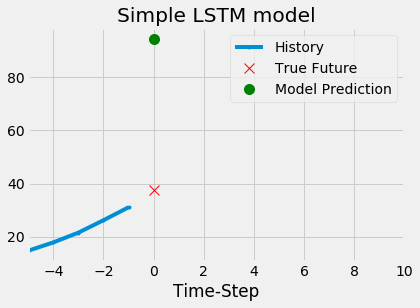

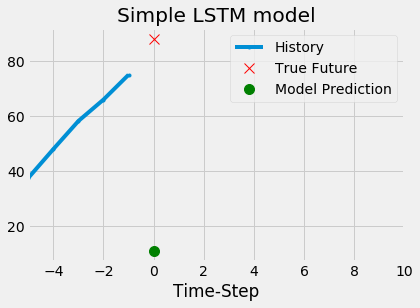

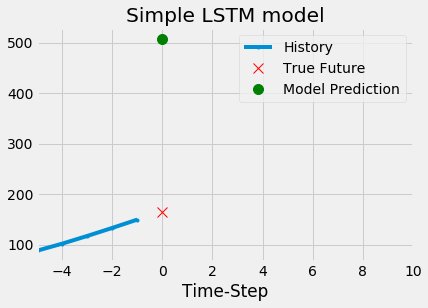

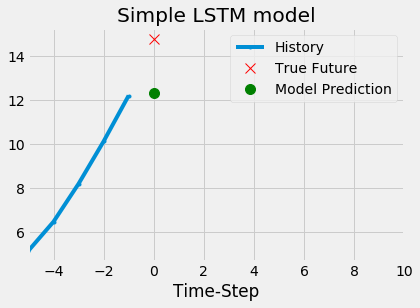

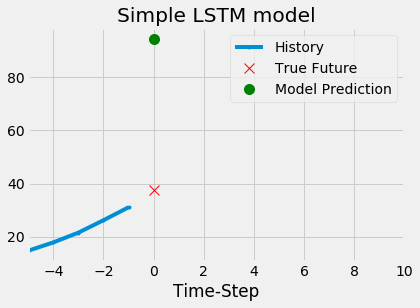

In [52]:
for x, y in val_univariate.take(10):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()

In [237]:
try:
    loss,accuracy = simple_lstm_model.evaluate(x_train[0:],y_train[0:])
except:
    loss,accuracy = (0,0)

45/45 [==============================] - 0s 442us/sample - loss: 0.0475
